In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from numpy import inf

%pylab inline
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

import io
import os
import zipfile

#function to download from the url

def getCSV(url, cache_name=None, is_zip=False,**kwargs):
    cache_name = cache_name or os.path.basename(url)
    if is_zip:
            # Get zip buffer
            remotezip = urllib.urlopen(url).read()
            # Open in memory
            with zipfile.ZipFile(io.BytesIO(remotezip)) as z:
                # Read the filename or the first file if there are naming inconsistencies
                read_zip_file = cache_name if cache_name in z.namelist() else z.namelist()[0]
                df = pd.read_csv(z.open(read_zip_file),**kwargs)
    else:
        df = pd.read_csv(urllib.urlopen(url),**kwargs)
    return df

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [2]:
dfgoogle =  getCSV(
    'https://docs.google.com/spreadsheets/d/1Gx3R244VRahX2Y3IyjQBWsIu7-NtYqK-0qhfswhXNWs/gviz/tq?tqx=out:csv&sheet={sheet_name}')

In [201]:
dfgoogle

,Unnamed: 0,Conditions,Date,Dew Point,Events,Gust Speed,Heat Index,Humidity,Precip,Pressure,Temp.,Time (EDT),Time (EST),Visibility,Wind Dir,Wind Speed,Windchill,Time,Date time,day
0,0,Overcast,"Jan. 01, 2016",25.0 °F,NaN,-,NaN,51%,NaN,30.06 in,42.1 °F,NaN,12:51 AM,10.0 mi,Variable,4.6 mph,39.2 °F,12:51 AM,2016-01-01 00:51:00,2016-01-01
1,1,Overcast,"Jan. 01, 2016",25.0 °F,NaN,-,NaN,53%,NaN,30.06 in,41.0 °F,NaN,1:51 AM,10.0 mi,Variable,3.5 mph,39.0 °F,1:51 AM,2016-01-01 01:51:00,2016-01-01
2,2,Overcast,"Jan. 01, 2016",26.1 °F,NaN,-,NaN,55%,NaN,30.06 in,41.0 °F,NaN,2:51 AM,10.0 mi,West,4.6 mph,38.0 °F,2:51 AM,2016-01-01 02:51:00,2016-01-01
3,3,Overcast,"Jan. 01, 2016",26.1 °F,NaN,-,NaN,55%,NaN,30.06 in,41.0 °F,NaN,3:51 AM,10.0 mi,West,9.2 mph,35.2 °F,3:51 AM,2016-01-01 03:51:00,2016-01-01
4,4,Overcast,"Jan. 01, 2016",26.1 °F,NaN,16.1 mph,NaN,58%,NaN,30.04 in,39.9 °F,NaN,4:51 AM,10.0 mi,West,10.4 mph,33.4 °F,4:51 AM,2016-01-01 04:51:00,2016-01-01
5,5,Overcast,"Jan. 01, 2016",26.1 °F,NaN,-,NaN,58%,NaN,30.05 in,39.9 °F,NaN,5:51 AM,10.0 mi,WNW,6.9 mph,35.1 °F,5:51 AM,2016-01-01 05:51:00,2016-01-01
6,6,Overcast,"Jan. 01, 2016",26.1 °F,NaN,-,NaN,60%,NaN,30.06 in,39.0 °F,NaN,6:51 AM,10.0 mi,Calm,Calm,-,6:51 AM,2016-01-01 06:51:00,2016-01-01
7,7,Overcast,"Jan. 01, 2016",25.0 °F,NaN,-,NaN,57%,NaN,30.05 in,39.0 °F,NaN,7:51 AM,10.0 mi,West,6.9 mph,34.0 °F,7:51 AM,2016-01-01 07:51:00,2016-01-01
8,8,Partly Cloudy,"Jan. 01, 2016",24.1 °F,NaN,-,NaN,55%,NaN,30.06 in,39.0 °F,NaN,8:51 AM,10.0 mi,West,6.9 mph,34.0 °F,8:51 AM,2016-01-01 08:51:00,2016-01-01
9,9,Overcast,"Jan. 01, 2016",25.0 °F,NaN,-,NaN,55%,NaN,30.06 in,39.9 °F,NaN,9:51 AM,10.0 mi,WNW,4.6 mph,36.7 °F,9:51 AM,2016-01-01 09:51:00,2016-01-01


In [401]:
dfgoogle = pd.read_csv("2013to2016_weather.csv")

In [402]:
dfgoogle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42519 entries, 0 to 42518
Data columns (total 17 columns):
Unnamed: 0    42519 non-null int64
Conditions    42519 non-null object
Date          42519 non-null object
Dew Point     42519 non-null object
Events        5231 non-null object
Gust Speed    42519 non-null object
Heat Index    9187 non-null object
Humidity      42519 non-null object
Precip        7363 non-null object
Pressure      42519 non-null object
Temp.         42519 non-null object
Time (EDT)    27551 non-null object
Time (EST)    14968 non-null object
Visibility    42519 non-null object
Wind Dir      42519 non-null object
Wind Speed    42519 non-null object
Windchill     18213 non-null object
dtypes: int64(1), object(16)
memory usage: 5.5+ MB


In [403]:
def split_time(x):
    x = x.split()
    if len(x[0]) > len(x[1]):
        return x[0]
    else :
        return x[1]
dfgoogle["Time"] = dfgoogle[['Time (EST)','Time (EDT)']].apply(lambda x : '{} {}'.format(x[0],x[1]), axis=1)
dfgoogle["Time"] = dfgoogle["Time"].apply(split_time)
dfgoogle["Time"]
dfgoogle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42519 entries, 0 to 42518
Data columns (total 18 columns):
Unnamed: 0    42519 non-null int64
Conditions    42519 non-null object
Date          42519 non-null object
Dew Point     42519 non-null object
Events        5231 non-null object
Gust Speed    42519 non-null object
Heat Index    9187 non-null object
Humidity      42519 non-null object
Precip        7363 non-null object
Pressure      42519 non-null object
Temp.         42519 non-null object
Time (EDT)    27551 non-null object
Time (EST)    14968 non-null object
Visibility    42519 non-null object
Wind Dir      42519 non-null object
Wind Speed    42519 non-null object
Windchill     18213 non-null object
Time          42519 non-null object
dtypes: int64(1), object(17)
memory usage: 5.8+ MB


In [404]:
dfgoogle["Date time"] = pd.to_datetime(dfgoogle["Date"] + " " + dfgoogle["Time"])

In [405]:
dfgoogle["day"] = pd.to_datetime(dfgoogle["Date"])
dfgoogle["day"] = dfgoogle["day"].dt.date
dfgoogle

,Unnamed: 0,Conditions,Date,Dew Point,Events,Gust Speed,Heat Index,Humidity,Precip,Pressure,Temp.,Time (EDT),Time (EST),Visibility,Wind Dir,Wind Speed,Windchill,Time,Date time,day
0,0,Overcast,"Jan. 01, 2013",24.1 °F,NaN,21.9 mph,NaN,55%,NaN,29.87 in,39.0 °F,NaN,12:51 AM,10.0 mi,West,10.4 mph,32.3 °F,12:51,2013-01-01 12:51:00,2013-01-01
1,1,Overcast,"Jan. 01, 2013",26.1 °F,NaN,17.3 mph,NaN,62%,NaN,29.88 in,37.9 °F,NaN,1:51 AM,10.0 mi,Variable,3.5 mph,35.5 °F,1:51,2013-01-01 01:51:00,2013-01-01
2,2,Overcast,"Jan. 01, 2013",27.0 °F,NaN,-,NaN,62%,NaN,29.88 in,39.0 °F,NaN,2:51 AM,10.0 mi,Variable,6.9 mph,34.0 °F,2:51,2013-01-01 02:51:00,2013-01-01
3,3,Overcast,"Jan. 01, 2013",27.0 °F,NaN,-,NaN,62%,NaN,29.88 in,39.0 °F,NaN,3:51 AM,10.0 mi,West,9.2 mph,32.8 °F,3:51,2013-01-01 03:51:00,2013-01-01
4,4,Overcast,"Jan. 01, 2013",27.0 °F,NaN,-,NaN,62%,NaN,29.88 in,39.0 °F,NaN,4:51 AM,10.0 mi,Variable,6.9 mph,34.0 °F,4:51,2013-01-01 04:51:00,2013-01-01
5,5,Overcast,"Jan. 01, 2013",26.1 °F,NaN,20.7 mph,NaN,60%,NaN,29.86 in,39.0 °F,NaN,5:51 AM,10.0 mi,Variable,6.9 mph,34.0 °F,5:51,2013-01-01 05:51:00,2013-01-01
6,6,Overcast,"Jan. 01, 2013",26.1 °F,NaN,20.7 mph,NaN,60%,NaN,29.88 in,39.0 °F,NaN,6:51 AM,10.0 mi,West,10.4 mph,32.3 °F,6:51,2013-01-01 06:51:00,2013-01-01
7,7,Overcast,"Jan. 01, 2013",27.0 °F,NaN,-,NaN,65%,NaN,29.88 in,37.9 °F,NaN,7:51 AM,10.0 mi,West,6.9 mph,32.7 °F,7:51,2013-01-01 07:51:00,2013-01-01
8,8,Overcast,"Jan. 01, 2013",27.0 °F,NaN,20.7 mph,NaN,62%,NaN,29.88 in,39.0 °F,NaN,8:51 AM,10.0 mi,Variable,6.9 mph,34.0 °F,8:51,2013-01-01 08:51:00,2013-01-01
9,9,Partly Cloudy,"Jan. 01, 2013",27.0 °F,NaN,17.3 mph,NaN,62%,NaN,29.89 in,39.0 °F,NaN,9:51 AM,10.0 mi,West,10.4 mph,32.3 °F,9:51,2013-01-01 09:51:00,2013-01-01


In [337]:
#dfgoogle['NEW_DATE'] = dfgoogle['day'].apply(lambda x: x - pd.DateOffset(years=1))

In [338]:
dfgoogle.head()

,Unnamed: 0,Conditions,Date,Dew Point,Events,Gust Speed,Heat Index,Humidity,Precip,Pressure,Temp.,Time (EDT),Time (EST),Visibility,Wind Dir,Wind Speed,Windchill,Time,Date time,day
0,0,Overcast,"Jan. 01, 2016",25.0 °F,NaN,-,NaN,51%,NaN,30.06 in,42.1 °F,NaN,12:51 AM,10.0 mi,Variable,4.6 mph,39.2 °F,12:51,2016-01-01 12:51:00,2016-01-01
1,1,Overcast,"Jan. 01, 2016",25.0 °F,NaN,-,NaN,53%,NaN,30.06 in,41.0 °F,NaN,1:51 AM,10.0 mi,Variable,3.5 mph,39.0 °F,1:51,2016-01-01 01:51:00,2016-01-01
2,2,Overcast,"Jan. 01, 2016",26.1 °F,NaN,-,NaN,55%,NaN,30.06 in,41.0 °F,NaN,2:51 AM,10.0 mi,West,4.6 mph,38.0 °F,2:51,2016-01-01 02:51:00,2016-01-01
3,3,Overcast,"Jan. 01, 2016",26.1 °F,NaN,-,NaN,55%,NaN,30.06 in,41.0 °F,NaN,3:51 AM,10.0 mi,West,9.2 mph,35.2 °F,3:51,2016-01-01 03:51:00,2016-01-01
4,4,Overcast,"Jan. 01, 2016",26.1 °F,NaN,16.1 mph,NaN,58%,NaN,30.04 in,39.9 °F,NaN,4:51 AM,10.0 mi,West,10.4 mph,33.4 °F,4:51,2016-01-01 04:51:00,2016-01-01


In [406]:
df1231 = dfgoogle[['Temp.','Humidity','Conditions']]
df1231.columns = ['Temp', 'Humi', 'Cond']
df1231.Cond.unique()

array(['Overcast', 'Partly Cloudy', 'Mostly Cloudy', 'Scattered Clouds',
       'Clear', 'Haze', 'Light Rain', 'Rain', 'Fog', 'Unknown',
       'Light Snow', 'Snow', 'Heavy Rain', 'Heavy Snow', 'Mist',
       'Light Freezing Rain', 'Light Freezing Fog'], dtype=object)

In [407]:
df1231_dummy = pd.get_dummies(df1231.Cond,prefix = '',prefix_sep='')
df1231_dummy.head()

,Clear,Fog,Haze,Heavy Rain,Heavy Snow,Light Freezing Fog,Light Freezing Rain,Light Rain,Light Snow,Mist,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds,Snow,Unknown
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [408]:
dfgoogle.columns

Index(['Unnamed: 0', 'Conditions', 'Date', 'Dew Point', 'Events', 'Gust Speed',
       'Heat Index', 'Humidity', 'Precip', 'Pressure', 'Temp.', 'Time (EDT)',
       'Time (EST)', 'Visibility', 'Wind Dir', 'Wind Speed', 'Windchill',
       'Time', 'Date time', 'day'],
      dtype='object')

In [409]:
df_year = dfgoogle[["day","Time","Date time","Temp.","Humidity","Visibility","Wind Speed"]]
df_year.columns = ['Date', 'Time' ,'Date time','Temp' ,'Humi', "Visibility","Wind Speed"]
df_year.head()

,Date,Time,Date time,Temp,Humi,Visibility,Wind Speed
0,2013-01-01,12:51,2013-01-01 12:51:00,39.0 °F,55%,10.0 mi,10.4 mph
1,2013-01-01,1:51,2013-01-01 01:51:00,37.9 °F,62%,10.0 mi,3.5 mph
2,2013-01-01,2:51,2013-01-01 02:51:00,39.0 °F,62%,10.0 mi,6.9 mph
3,2013-01-01,3:51,2013-01-01 03:51:00,39.0 °F,62%,10.0 mi,9.2 mph
4,2013-01-01,4:51,2013-01-01 04:51:00,39.0 °F,62%,10.0 mi,6.9 mph


In [410]:
#df1231_dummy = df1231_dummy.groupby(np.arange(len(df1231_dummy))//4).sum()

In [411]:
df_year.head()

,Date,Time,Date time,Temp,Humi,Visibility,Wind Speed
0,2013-01-01,12:51,2013-01-01 12:51:00,39.0 °F,55%,10.0 mi,10.4 mph
1,2013-01-01,1:51,2013-01-01 01:51:00,37.9 °F,62%,10.0 mi,3.5 mph
2,2013-01-01,2:51,2013-01-01 02:51:00,39.0 °F,62%,10.0 mi,6.9 mph
3,2013-01-01,3:51,2013-01-01 03:51:00,39.0 °F,62%,10.0 mi,9.2 mph
4,2013-01-01,4:51,2013-01-01 04:51:00,39.0 °F,62%,10.0 mi,6.9 mph


In [345]:
#df1231_dummy

In [346]:
#df1231.columns

In [347]:
#df1231_dropcond = df1231.drop(['Cond'], axis = 1)
#df1231_dropcond

In [412]:
df_year.is_copy = False
columns = {'Temp' : '°', 'Humi': '%', 'Visibility' :'m',  'Wind Speed' : 'm'}


def convert_to_number(x):
    
    if x == "-" or x == 'N/A%' or x == "Calm":
        return ""
    else:
        #print(x)
        return float(x.split(value)[0])

for key, value in columns.items():
    #print(key,value)
    df_year[key] = df_year[key].apply(convert_to_number)


In [413]:

for i in columns:
    df_year[i] = pd.Series(df_year[i]).convert_objects(convert_numeric=True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [414]:
#column = list(df_year.columns)
#column = column[2:]

In [415]:
#df_year.is_copy = False
#for i in column:
#    df_year[i] = pd.Series(df_year[i]).convert_objects(convert_numeric=True)

In [416]:
df_year.head()

,Date,Time,Date time,Temp,Humi,Visibility,Wind Speed
0,2013-01-01,12:51,2013-01-01 12:51:00,39.0,55.0,10.0,10.4
1,2013-01-01,1:51,2013-01-01 01:51:00,37.9,62.0,10.0,3.5
2,2013-01-01,2:51,2013-01-01 02:51:00,39.0,62.0,10.0,6.9
3,2013-01-01,3:51,2013-01-01 03:51:00,39.0,62.0,10.0,9.2
4,2013-01-01,4:51,2013-01-01 04:51:00,39.0,62.0,10.0,6.9


In [417]:
#df1231_dropcond = df1231_dropcond.groupby(np.arange(len(df1231_dropcond))//4).mean()

In [380]:
#df_year = df_year.dropna()

In [62]:
#df1231_dummy.reset_index()

In [424]:
df_year = df_year.merge(df1231_dummy, right_index = True, left_index  = True, how = 'outer')

In [428]:
df_2013 = df_year[df_year["Date time"] < "20140101"]
df_2014 = df_year[(df_year["Date time"] > "20140101") &(df_year["Date time"] < "20150101")]
df_2015 = df_year[(df_year["Date time"] > "20150101") &(df_year["Date time"] < "20160101")]
df_2016 = df_year[(df_year["Date time"] > "20160101") &(df_year["Date time"] < "20170101")]


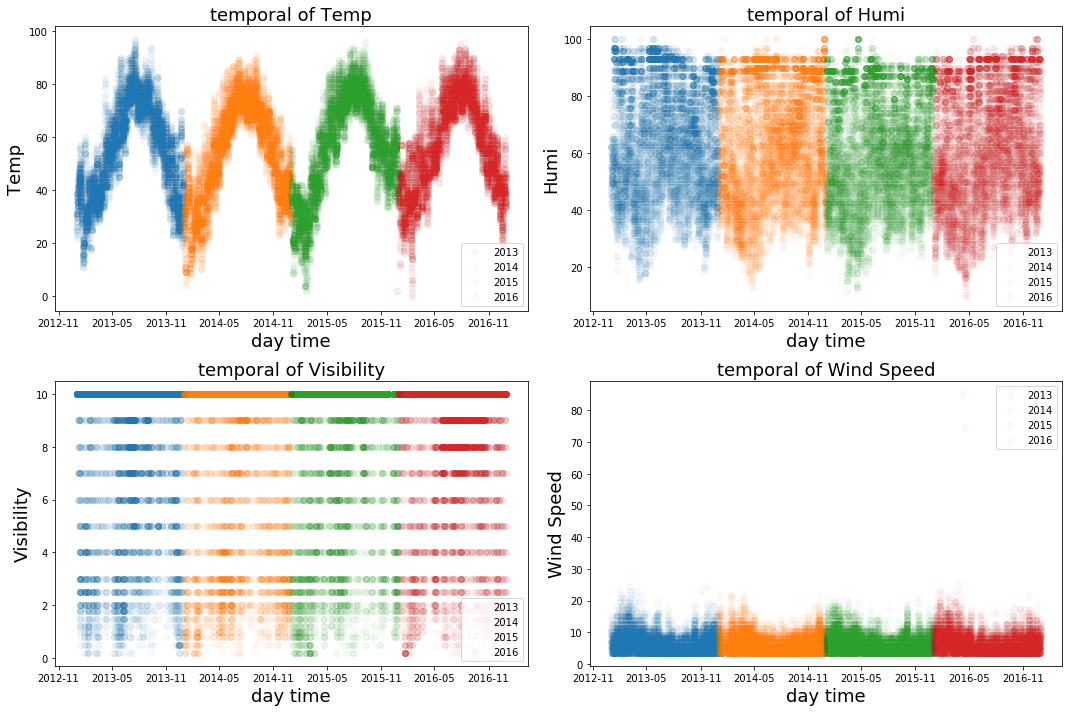

In [479]:
fig = pl.figure(figsize=(15,10))
i = 1
dis_titles = ['Temp', 'Humi',"Visibility","Wind Speed"]
for dist in dis_titles:
    #print(dist)
    ax_mu_n = fig.add_subplot(2,2,i)
    
    
    ax_mu_n.plot(df_2013["Date time"], df_2013[dist], 'o', marker='o', label= "2013",alpha = 0.03)
    ax_mu_n.plot(df_2014["Date time"], df_2014[dist], 'o', marker='o', label= "2014",alpha = 0.03)
    ax_mu_n.plot(df_2015["Date time"], df_2015[dist], 'o', marker='o', label= "2015",alpha = 0.03)
    ax_mu_n.plot(df_2016["Date time"], df_2016[dist], 'o', marker='o', label= "2016",alpha = 0.03)
    #ax_mu_n.plot(df_year["Date time"], df_year[dist], '-',label=dist, marker='o')
    ax_mu_n.set_xlabel('day time', fontsize=18)
    ax_mu_n.set_ylabel(dist, fontsize=18)
    ax_mu_n.set_title("temporal of {}".format(dist), fontsize=18)
    plt.legend()
    #ax_mu_n.plot([0, 2000], [mean_number/10, mean_number/10], 'k')
    i += 1
plt.tight_layout()
savefig('Conditions_2013to2016.png')

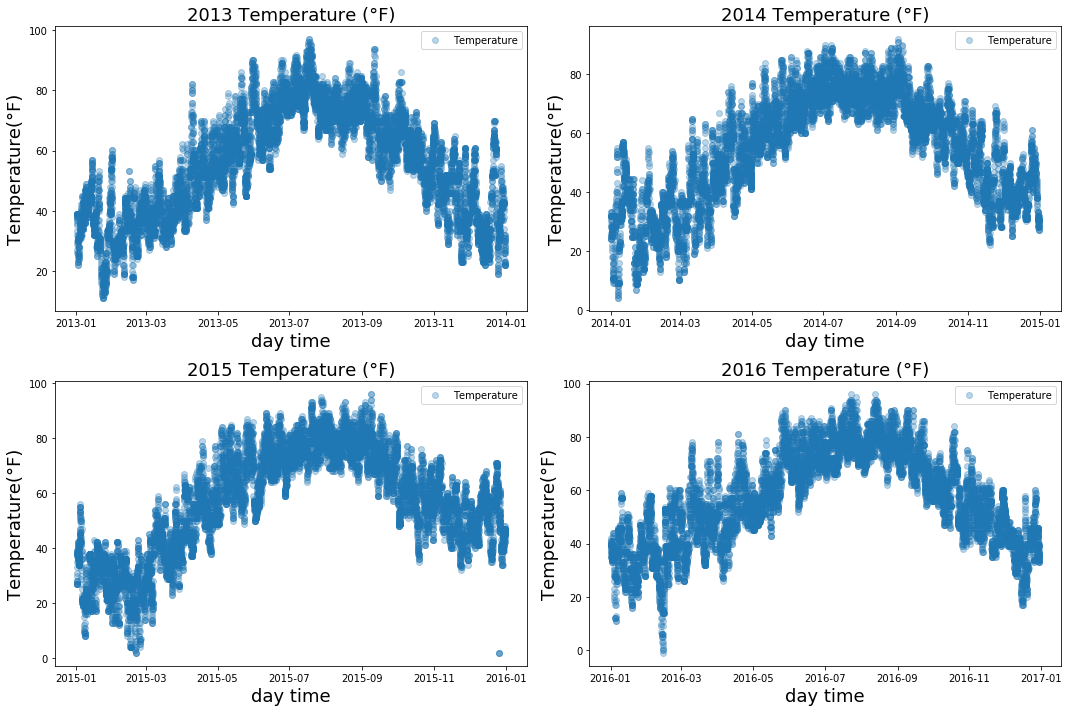

In [480]:
fig = pl.figure(figsize=(15,10))
i = 1
year = 2013
dis_titles = ['Temp', 'Humi',"Visibility","Wind Speed"]
df = [df_2013,df_2014,df_2015,df_2016]
for j in df:
    #print(dist)
    ax_mu_n = fig.add_subplot(2,2,i)
    df = j
    
    dist = "Temperature"
    ax_mu_n.plot(df["Date time"], df["Temp"], 'o',label=dist, marker='o',alpha = 0.3)
    #ax_mu_n.plot(df["Date time"], df["Temp"], 'o',label=dist, marker='o',alpha = 0.5)
    #ax_mu_n.plot(df["Date time"], df["Humi"], 'o',label="Humidity", marker='o',alpha = 0.08)
    
    
    #ax_mu_n.plot(df_2015["Date time"], df_2015[dist], 'o',label=dist, marker='o')
    #ax_mu_n.plot(df_2016["Date time"], df_2016[dist], 'o',label=dist, marker='o')
    #ax_mu_n.plot(df_year["Date time"], df_year[dist], '-',label=dist, marker='o')
    ax_mu_n.set_xlabel('day time', fontsize=18)
    ax_mu_n.set_ylabel(dist + "(°F)", fontsize=18)
    ax_mu_n.set_title("{} {} (°F)".format(year , dist), fontsize=18)
    plt.legend()
    #ax_mu_n.plot([0, 2000], [mean_number/10, mean_number/10], 'k')
    i += 1
    year += 1
plt.tight_layout()
savefig('Temp_2013to2016.png')

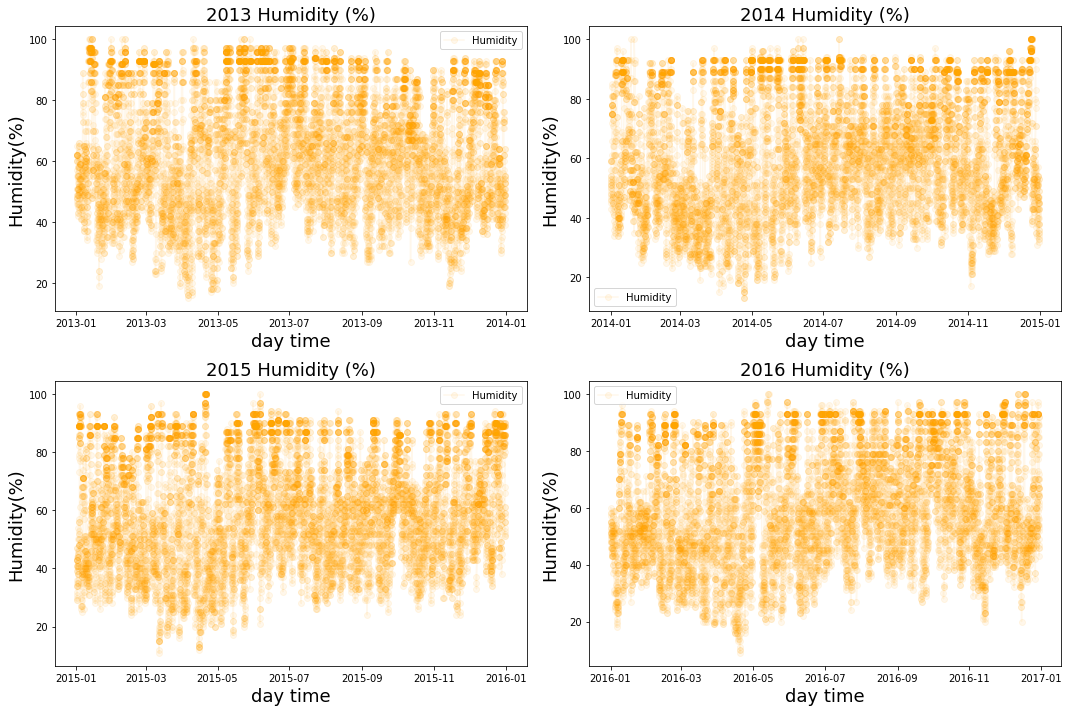

In [481]:
fig = pl.figure(figsize=(15,10))
i = 1
year = 2013
dis_titles = ['Temp', 'Humi',"Visibility","Wind Speed"]
df = [df_2013,df_2014,df_2015,df_2016]
for j in df:
    #print(dist)
    ax_mu_n = fig.add_subplot(2,2,i)
    df = j
    
    dist = "Humidity"
    #ax_mu_n.plot(df["Date time"], df["Temp"], 'o',label=dist, marker='o',alpha = 0.3)
    #ax_mu_n.plot(df["Date time"], df["Temp"], 'o',label=dist, marker='o',alpha = 0.5)
    ax_mu_n.plot(df["Date time"], df["Humi"], '-',label="Humidity", marker='o',alpha = 0.08,color = "orange")
    
    
    #ax_mu_n.plot(df_2015["Date time"], df_2015[dist], 'o',label=dist, marker='o')
    #ax_mu_n.plot(df_2016["Date time"], df_2016[dist], 'o',label=dist, marker='o')
    #ax_mu_n.plot(df_year["Date time"], df_year[dist], '-',label=dist, marker='o')
    ax_mu_n.set_xlabel('day time', fontsize=18)
    ax_mu_n.set_ylabel(dist + "(%)", fontsize=18)
    ax_mu_n.set_title("{} {} (%)".format(year , dist), fontsize=18)
    plt.legend()
    #ax_mu_n.plot([0, 2000], [mean_number/10, mean_number/10], 'k')
    i += 1
    year += 1
plt.tight_layout()
savefig('Humidity_2013to2016.png')

In [444]:
yr = 2013
df =df_2013
spring = (df["Date time"] > "{}0101".format(yr) )& (df["Date time"] < "{}0401".format(yr))
summer = (df["Date time"] > "{}0401".format(yr) )& (df["Date time"] < "{}0701".format(yr))
fall   = (df["Date time"] > "{}0701".format(yr) )& (df["Date time"] < "{}1001".format(yr))
winter = (df["Date time"] > "{}1001".format(yr) )& (df["Date time"] < "{}0101".format(yr+1))

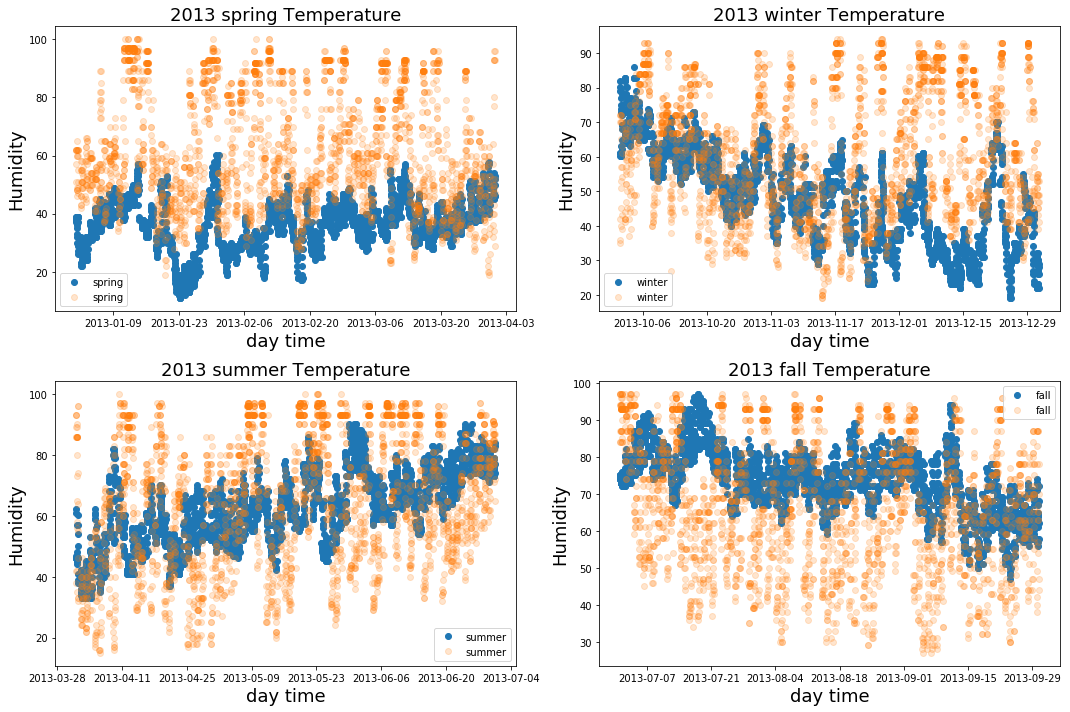

In [482]:
fig = pl.figure(figsize=(15,10))
i = 1
dis_titles = ['Temp', 'Humi',"Visibility","Wind Speed"]
df = [df_2013,df_2014,df_2015,df_2016]
seasons = {"spring":spring,"summer":summer,"fall":fall,"winter":winter}
for name ,season in seasons.items():
    #print(dist)
    ax_mu_n = fig.add_subplot(2,2,i)
    df = df_2013
    year =2013
    
    ax_mu_n.plot(df[season]["Date time"], df[season]["Temp"], 'o',label=name, marker='o')
    ax_mu_n.plot(df[season]["Date time"], df[season]["Humi"], 'o',label=name, marker='o',alpha = 0.2)
    #ax_mu_n.plot(df_2015["Date time"], df_2015[dist], 'o',label=dist, marker='o')
    #ax_mu_n.plot(df_2016["Date time"], df_2016[dist], 'o',label=dist, marker='o')
    #ax_mu_n.plot(df_year["Date time"], df_year[dist], '-',label=dist, marker='o')
    ax_mu_n.set_xlabel('day time', fontsize=18)
    ax_mu_n.set_ylabel(dist, fontsize=18)
    ax_mu_n.set_title("{} {} Temperature".format(year,name), fontsize=18)
    plt.legend()
    #ax_mu_n.plot([0, 2000], [mean_number/10, mean_number/10], 'k')
    i += 1
plt.tight_layout()
savefig('Temp_season_2013.png')